In [1]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty
from tqdm import tqdm

Load save:

In [13]:
dsampler = dynesty.DynamicNestedSampler.restore('dynesty_saves/saricicek_unrestricted_heights.save')
dsampler2 = dynesty.DynamicNestedSampler.restore('dynesty_saves/novo_mesto_unrestricted_sorted.save')
results = dsampler.results
results2 = dsampler2.results

burnin = 2000
samples = results.samples[burnin:]
samples2 = results2.samples[burnin:]
ndim = len(samples.T)
ndim2 = len(samples2.T)

Summary:

In [14]:
results.summary(), results2.summary()

Summary
niter: 64169
ncall: 2277045
eff(%):  2.818
logz: -221.336 +/-  0.226
Summary
niter: 47518
ncall: 9877381
eff(%):  0.471
logz: -59.544 +/-  0.152


(None, None)

In [15]:
# directory = './dynesty_saves'
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         dsamp = dynesty.DynamicNestedSampler.restore(f)
#         print(filename, dsamp.results.samples_n)

Samples:

In [16]:
samples[-1], samples2[-1]

(array([4.63022945e+03, 3.92871295e+01, 4.09907591e+01, 9.99775496e+01,
        1.03644134e-06, 7.29538299e-07, 4.89055115e-07, 1.38234406e-01,
        8.65402822e-03, 6.38924191e+01, 8.30418669e+02, 3.25632286e+02,
        5.81728814e+02, 4.35123084e+04, 4.03205502e+04, 3.76734179e+04]),
 array([7.90017227e+03, 7.80696991e-01, 5.84601585e+00, 5.50034051e-01,
        4.26410277e+00, 3.68132888e+01, 9.96575406e+01, 1.98818851e+01,
        2.12084019e+01, 2.08977599e-06, 7.96429798e-06, 8.64011462e-07,
        8.46941592e-07, 7.53304743e-07, 6.60766904e-07, 5.60689749e-06,
        9.05345855e-04, 4.10492095e-04, 9.60782489e-04, 3.93525223e-04,
        9.99783542e-04, 2.47377008e-04, 6.72943717e-04, 8.15738433e-03,
        3.40419467e-03, 4.03501459e-03, 3.34447130e-03, 9.94579109e-03,
        1.10381013e-03, 1.23122225e-03, 7.19904608e+04, 5.42536068e+04,
        4.89791715e+04, 4.04876671e+04, 3.59995850e+04, 3.55792736e+04,
        2.96171915e+04, 2.38584904e+04]))

Text(0, 0.5, 'mass')

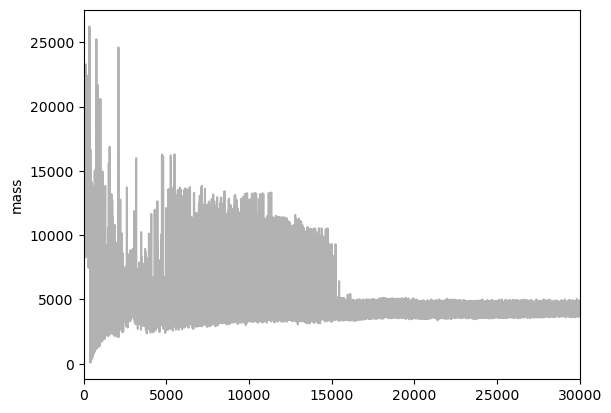

In [17]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
# plt.plot(samples2[:, 0], 'r', alpha=0.3)
plt.xlim(0., 30000.)
plt.ylabel('mass')

In [18]:
samples[:, 0].flatten()

array([16550.78580401, 16041.39719765, 17365.30406336, ...,
        4621.83866114,  4627.5225835 ,  4630.22945271])

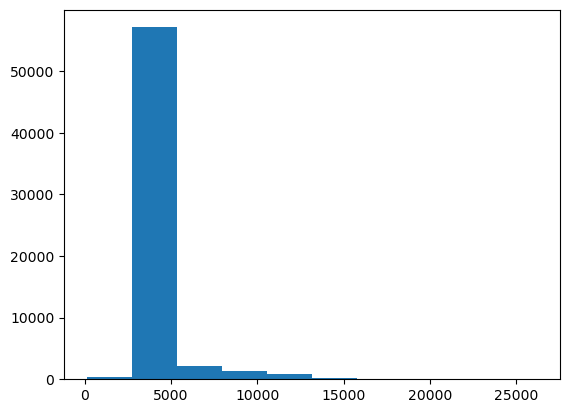

In [19]:
plt.hist(samples[:, 0].flatten())
plt.show()

dyplots:

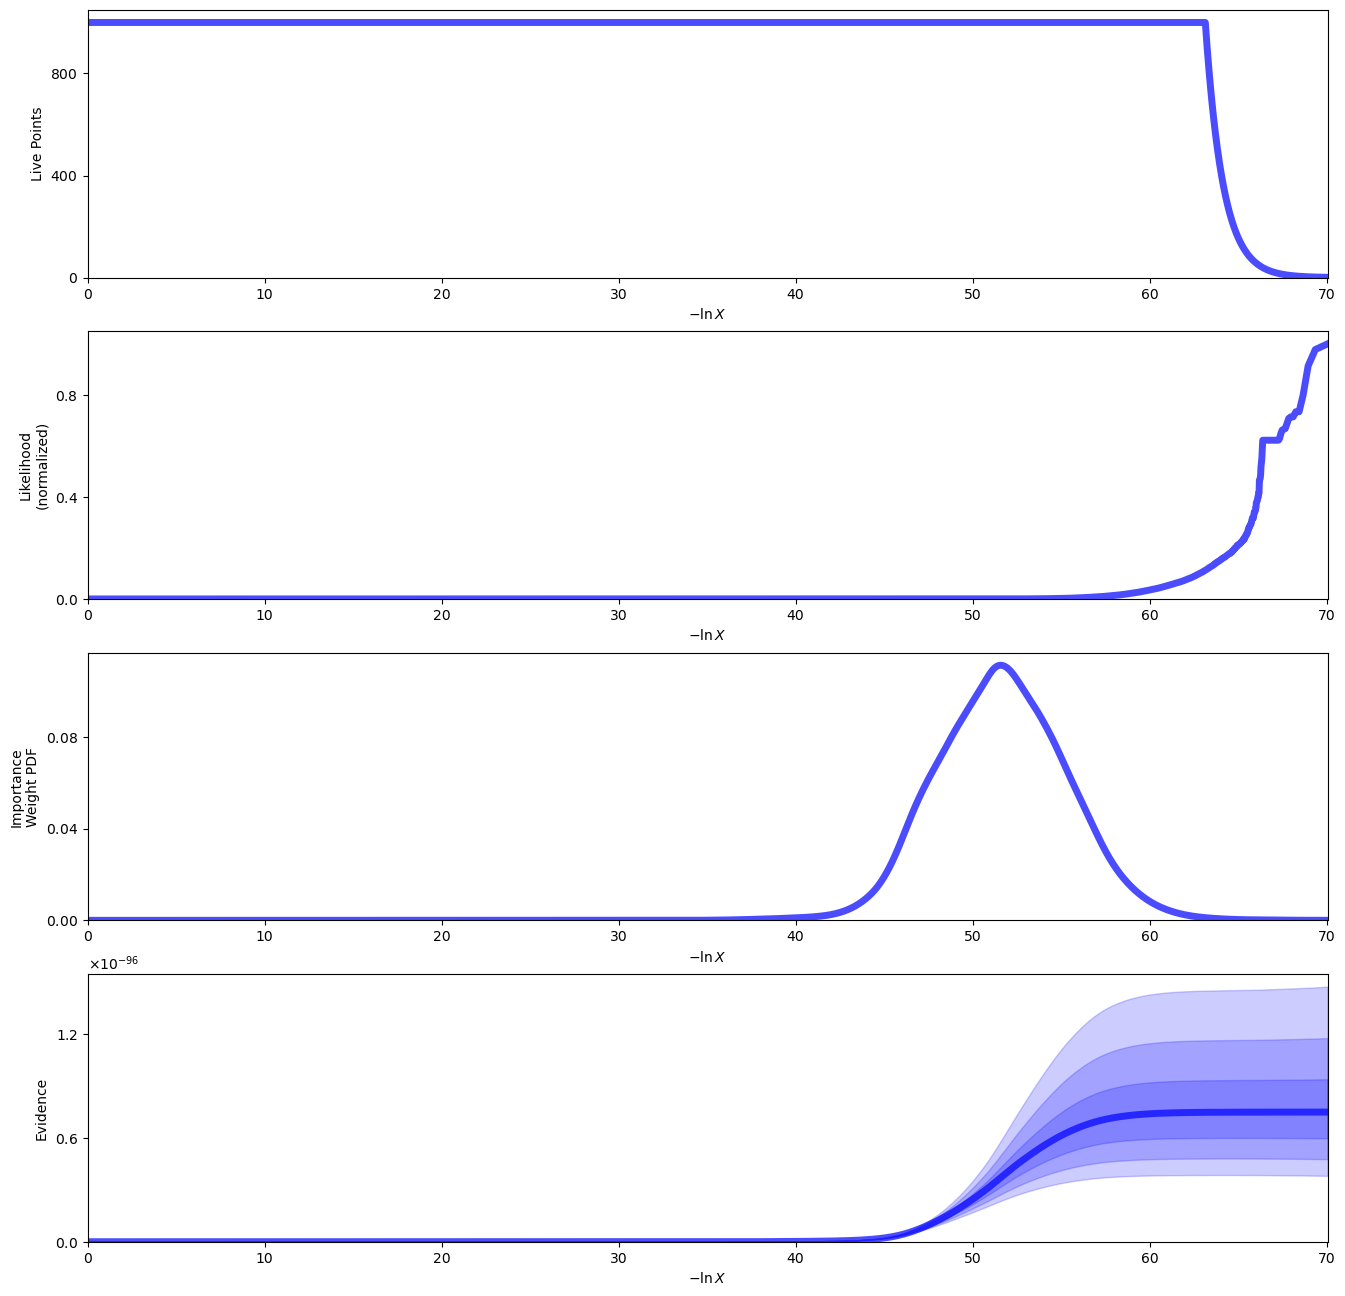

In [20]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

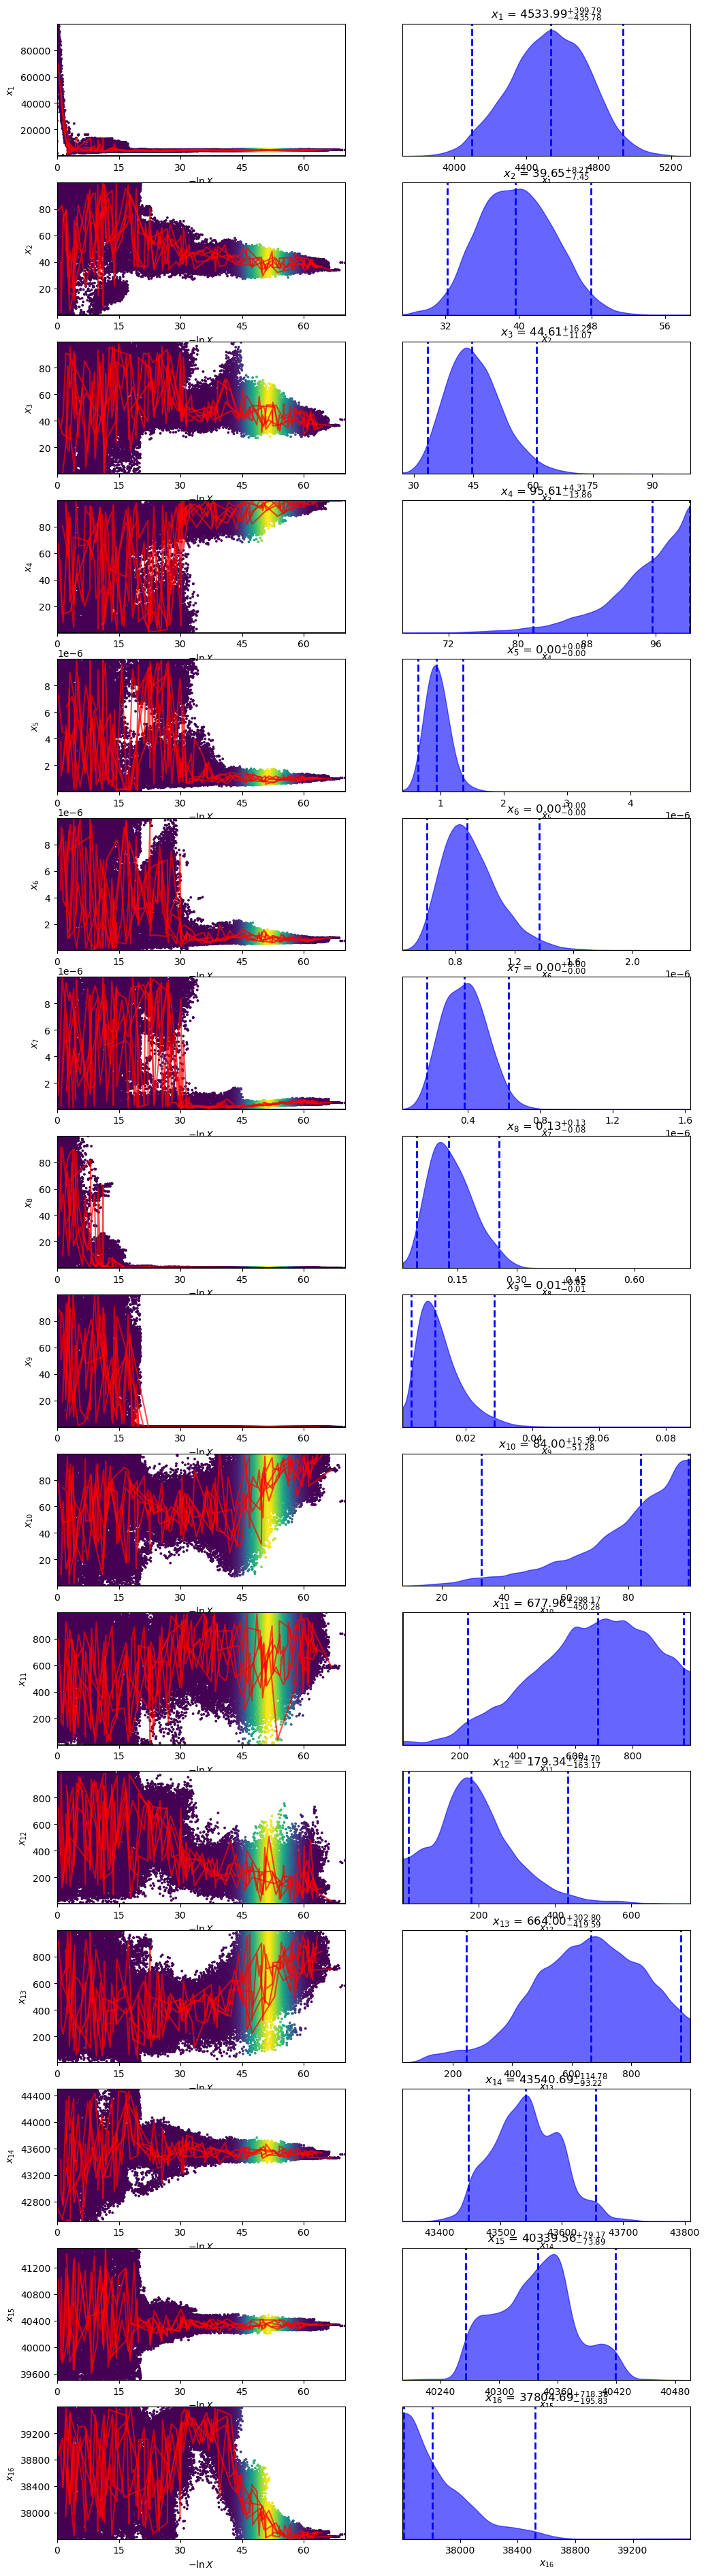

In [21]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

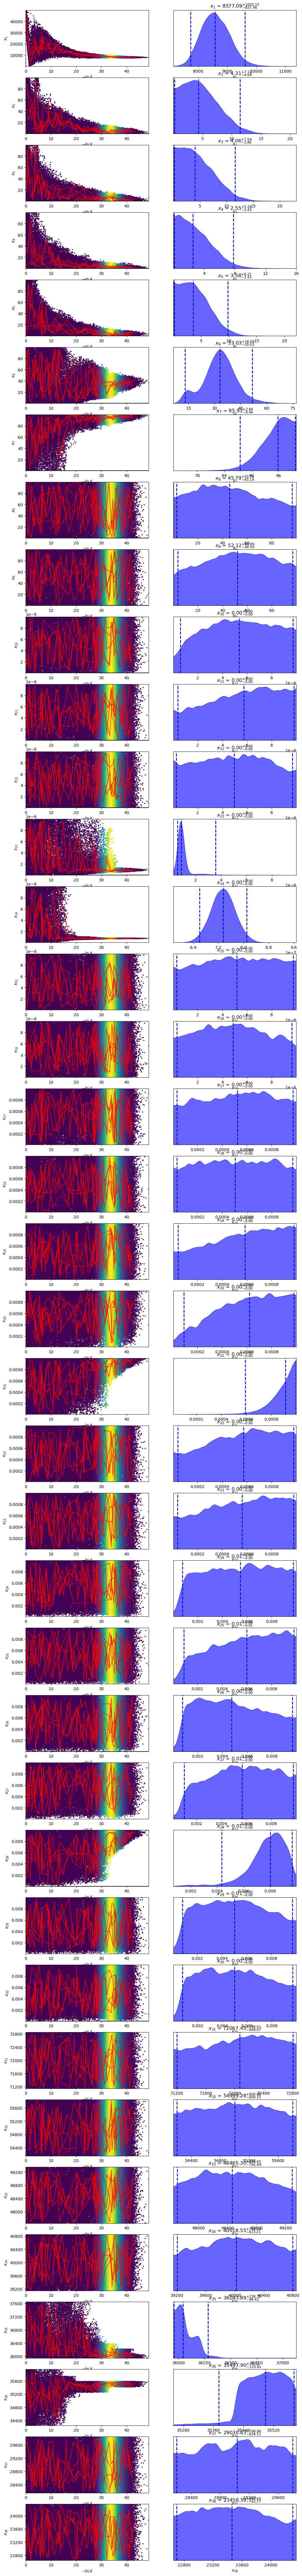

In [22]:
fig2, axes2 = dyplot.traceplot(results2, truths=np.zeros(ndim2),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

In [23]:
np.nanmedian(samples[:, 0])

4482.5742380207475